# 1. Project Introduction
**Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe disease. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br> **SARS-CoV-2 (n-coronavirus)** is the new virus of the coronavirus family, which first *discovered* in 2019, which has not been identified in humans before. 

It is a *contiguous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on the date 10 June 2020), this leads to a total of *500K+ Deaths* across the globe.<br>

Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# Table of contents
* [2. Downloading and Installing Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Downloading the Dataset](#3.-Downloading-the-Dataset)

* [4. Global Analysis](#4.-Global-Analysis)

    * [Problem 1](#Problem-1)
    * [Problem 2](#Problem-2)
    * [Problem 3](#Problem-3)
    * [Problem 4](#Problem-4)
    * [Problem 6](#Problem-5)
    * [Problem 6](#Problem-6)
    * [Problem 7](#Problem-7)

* [5. Continent Analysis](#5.-Continent-Analysis)
    * [Problem 8](#Problem-8)
    * [Problem 9](#Problem-9)
    * [Problem 10](#Problem-10)
    * [Problem 11](#Problem-11)
    * [Problem 12](#Problem-12)
    * [Problem 13](#Problem-13)

* [6. Country Analysis](#5.-Country-Analysis)
    * [Problem 14](#Problem-14)
    * [Problem 15](#Problem-15)
    * [Problem 16](#Problem-16)
    * [Problem 17](#Problem-17)
    
* [7. Advanced Analysis](#7.-Advanced-Analysis)
    * [Problem 18](#Problem-18)
    * [Problem 19](#Problem-19)
    * [Problem 20](#Problem-20)
    * [Problem 21](#Problem-21)
    * [Problem 22](#Problem-22)

# 2. Downloading and Installing Prerequisite
**pycountry_convert**: Using country data derived from wikipedia, this package provides conversion functions between ISO country names, country-codes, and continent names.

**folium, seaborn, plotly**: Some visualization packages in Python.

Uncomment and install some packages if you have not installed them. Otherwise, let continue.

In [1]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Downloading the Dataset

This dataset is updated on daily basis by Johns Hopkins CSSE.

In [2]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

## Have a look at the general data:

In [3]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  10/10/21  10/11/21  10/12/21  \
0        0        0        0        0  ...    155508    155540    155599   
1        0        0        0        0  ...    174968    175163    175664   
2        0        0        0        0  ...    204597    204695    204790   
3        0        0        0        0  ...     15291     15307     15307   
4        0        0        0        0  ...     61378     61580     61794   

   10/13/21  10/14/21  10/15/21  10/16/21  10/17/21  10/18/21  10/19/21  
0    155627    155682    155688    155739    155764    155776    155801  
1    176172    176667    177108    177536    177971    178188    178804  
2    204900    205005    205106    205199    205286    205364    205453  
3     15314     15326     15338     15338     15338     15367     15369  
4     62143     62385     62606     62789     62842     63012     63197  

[5 rows x 641 columns]

In [4]:
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  10/10/21  10/11/21  10/12/21  \
0        0        0        0        0  ...      7225      7228      7230   
1        0        0        0        0  ...      2768      2777      2783   
2        0        0        0        0  ...      5853      5855      5859   
3        0        0        0        0  ...       130       130       130   
4        0        0        0        0  ...      1622      1629      1642   

   10/13/21  10/14/21  10/15/21  10/16/21  10/17/21  10/18/21  10/19/21  
0      7234      7238      7238      7238      7243      7246      7247  
1      2788      2797      2807      2810      2820      2829      2841  
2      5862      5864      5867      5870      5872      5873      5875  
3       130       130       130       130       130       130       130  
4      1650      1653      1660      1662      1664      1670      1678  

[5 rows x 641 columns]

In [5]:
recoveries_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  10/10/21  10/11/21  10/12/21  \
0        0        0        0        0  ...         0         0         0   
1        0        0        0        0  ...         0         0         0   
2        0        0        0        0  ...         0         0         0   
3        0        0        0        0  ...         0         0         0   
4        0        0        0        0  ...         0         0         0   

   10/13/21  10/14/21  10/15/21  10/16/21  10/17/21  10/18/21  10/19/21  
0         0         0         0         0         0         0         0  
1         0         0         0         0         0         0         0  
2         0         0         0         0         0         0         0  
3         0         0         0         0         0         0         0  
4         0         0         0         0         0         0         0  

[5 rows x 641 columns]

Look carefully at the data, we found that in the recoveries file, there are lots of missing most recent information. For example, look at recoveries information of US, we found these:

In [6]:
a = recoveries_df[recoveries_df['Country/Region'] == 'US']

In [7]:
a.values

array([[nan, 'US', 40.0, -100.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 6,
        6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 12, 12, 12, 12, 17,
        17, 105, 121, 147, 176, 178, 178, 348, 361, 681, 869, 1072, 2665,
        5644, 7024, 8474, 9001, 9707, 14652, 17448, 19581, 21763, 23559,
        25410, 28790, 31270, 32988, 43482, 47763, 52096, 54703, 58545,
        64840, 70337, 72329, 75204, 77366, 80203, 99079, 100372, 106988,
        111424, 115936, 120720, 153947, 164015, 175382, 180152, 187180,
        189791, 189910, 195036, 198993, 212534, 216169, 232733, 230287,
        243430, 246414, 250747, 268376, 272265, 283178, 289392, 294312,
        298418, 350135, 361239, 366736, 379157, 384902, 391508, 399991,
        406446, 416461, 444758, 458231, 463868, 479258, 485002, 491706,
        500849, 506367, 518522, 524855, 533504, 540292, 547386, 556606,
        561816, 576334, 583503, 592191, 599115, 606715, 61

There are lots of 0 in the most recent days, maybe due to update status or something else. Each countries have difference update status.

There are some options to deal with this problem:
* Option 1: We can fill the number in the last updated day to fill to 0 fields. It is problematic since it show a wrong number.
* Option 2: We cut all the most recent days that shows 0. 
* Option 3: We can find other source to fill to these fields. However, each source may have different number.
* Option 4: We can limit the day in all data to the last day in the stater code, which is '7/19/20'

After asking for advice from mentor dang.quang.vinh, I chose option 4.

In [8]:
confirmed_df = confirmed_df.loc[:, :'7/19/20']
deaths_df = deaths_df.loc[:, :'7/19/20']
recoveries_df = recoveries_df.loc[:, :'7/19/20']

#  4. Global Analysis

## Problem 1

    Calculate the number of total cases, total deaths, total recovered, and total active by time (day units).

In [9]:
#pull out the numbers
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

#create data series
total_cases = confirmed.sum(axis = 0)
total_deaths = deaths.sum(axis = 0)
mortality_rate = total_deaths*100/total_cases
total_recovered = recoveries.sum(axis = 0)
recovery_rate = total_recovered*100/total_cases
total_active = total_cases - total_recovered - total_deaths

In [10]:
#create dataframe for each category
total_cases_df = total_cases.to_frame().reset_index()
total_cases_df.columns = ['Day', 'Number']
total_deaths_df = total_deaths.to_frame().reset_index()
total_deaths_df.columns = ['Day', 'Number']
total_recovered_df = total_recovered.to_frame().reset_index()
total_recovered_df.columns = ['Day', 'Number']
mortality_rate_df = mortality_rate.to_frame().reset_index()
mortality_rate_df.columns = ['Day', 'Number']
recovery_rate_df = recovery_rate.to_frame().reset_index()
recovery_rate_df.columns = ['Day', 'Number']
total_active_df = total_active.to_frame().reset_index()
total_active_df.columns = ['Day', 'Number']

In [11]:
#  The number of total cases, total deaths, total recovered, and total active until '7/19/20'.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  14514204
Total death cases:  638758
Total recoveries cases:  8133881
Total active cases:  5741565


## Problem 2

    Visualize the number and the log(10) of total cases, total deaths, total recovered, and total active by time (day units) in 2 graph (one for the number and the other for the log(10)) using line chart.

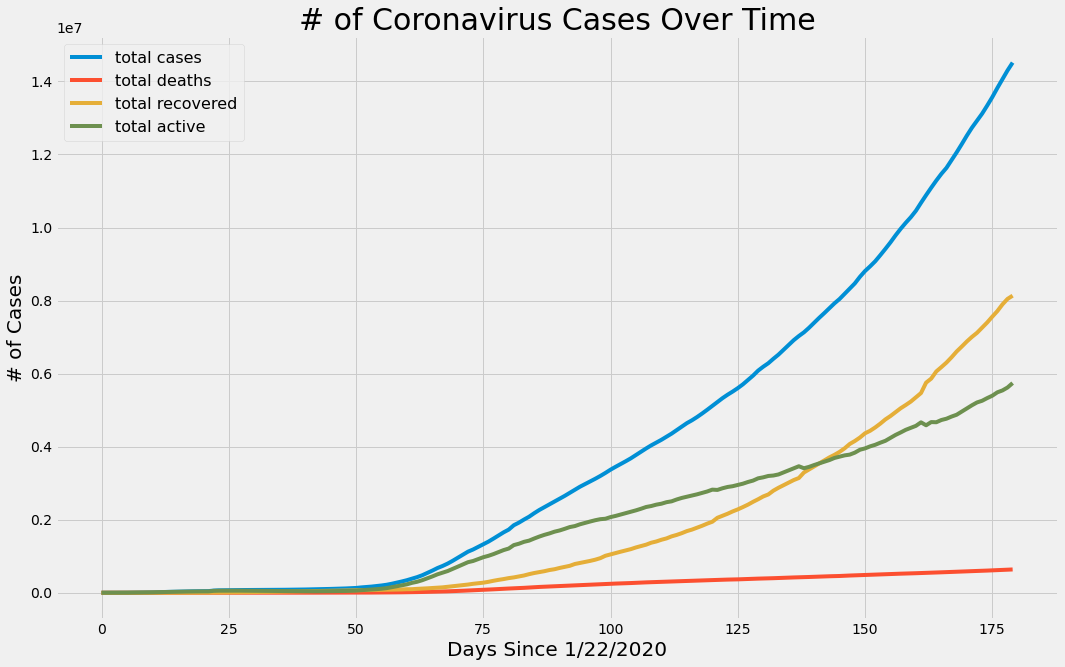

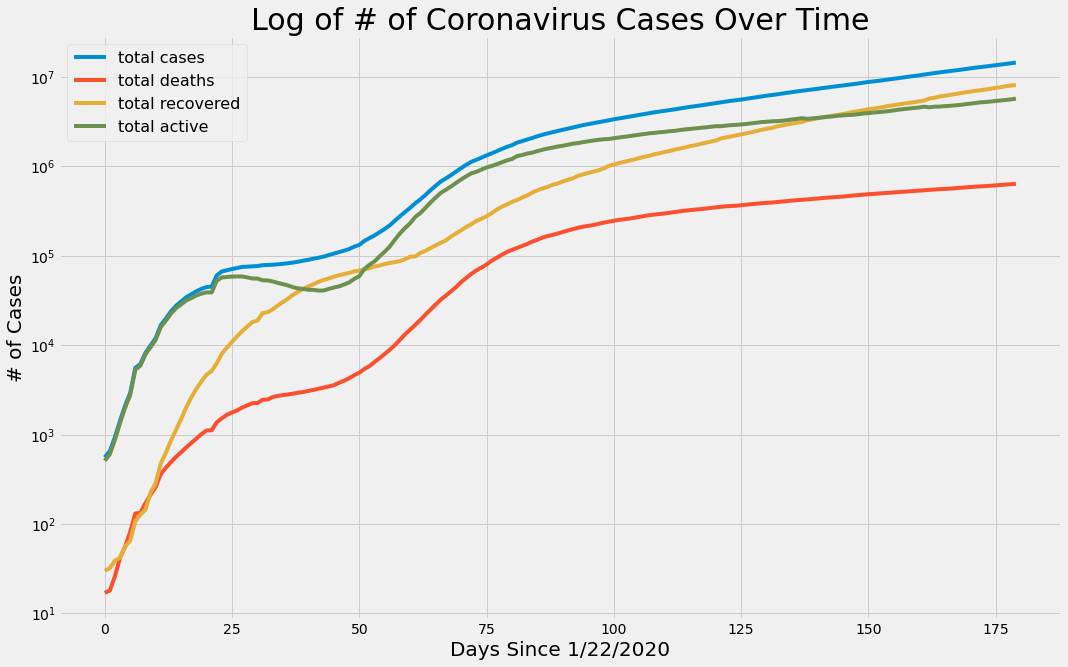

In [12]:
#create graph normal scaled
plt.figure(figsize = (16,10))
total_cases_df.Number.plot(label = 'total cases')
total_deaths_df.Number.plot(label = 'total deaths')
total_recovered_df.Number.plot(label = 'total recovered')
total_active_df.Number.plot(label = 'total active')
plt.title('# of Coronavirus Cases Over Time', fontsize = 30)
plt.xlabel('Days Since 1/22/2020', fontsize = 20)
plt.ylabel('# of Cases', fontsize = 20)
plt.legend(fontsize = 16)

#create graph log scaled
plt.figure(figsize = (16,10))
total_cases_df.Number.plot(label = 'total cases')
total_deaths_df.Number.plot(label = 'total deaths', logy = True)
total_recovered_df.Number.plot(label = 'total recovered', logy = True)
total_active_df.Number.plot(label = 'total active', logy = True)
plt.title('Log of # of Coronavirus Cases Over Time', fontsize = 30)
plt.xlabel('Days Since 1/22/2020', fontsize = 20)
plt.ylabel('# of Cases', fontsize = 20)
plt.legend(fontsize = 16)
plt.show()

## Problem 3
    Visualize the number of total cases, total deaths, total recovered, and total active by time (day units) in 4 separated graphs using line chart.

In [13]:
#create lists to iterate through
list_df = (total_cases_df, total_deaths_df, total_recovered_df, total_active_df)
list_name = ('Total Cases', 'Deaths', 'Recoveries', 'Active Cases')

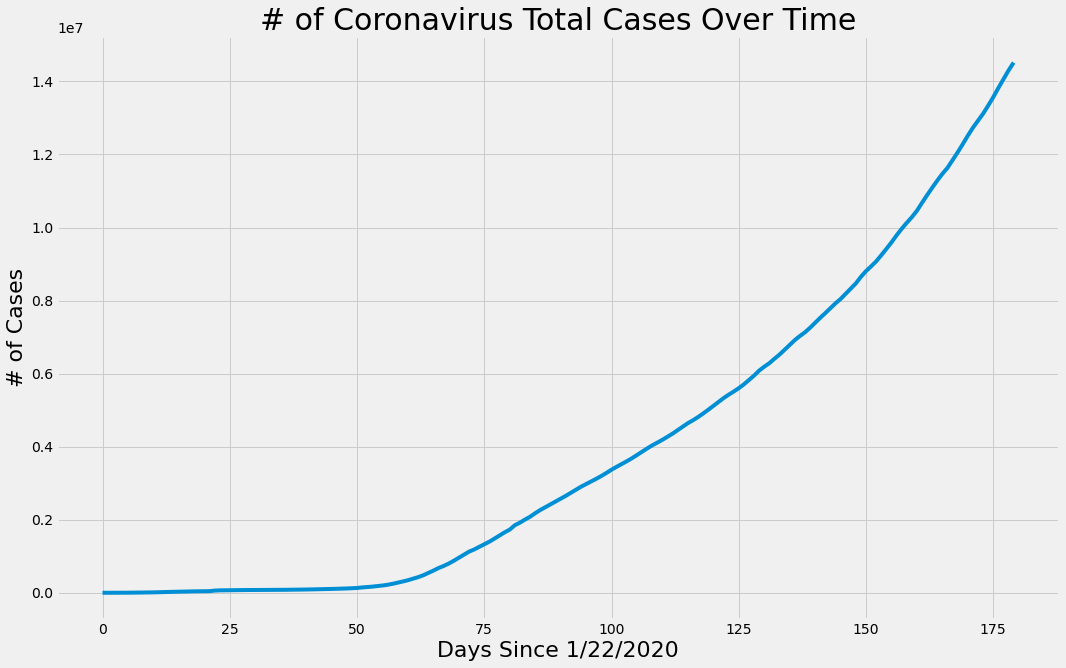

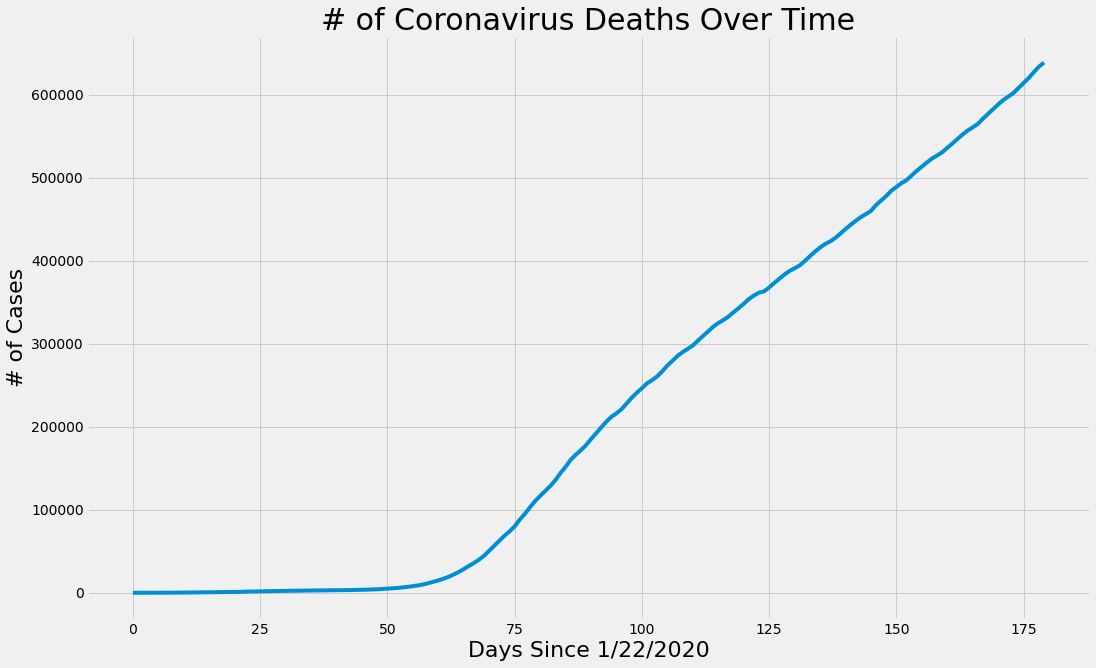

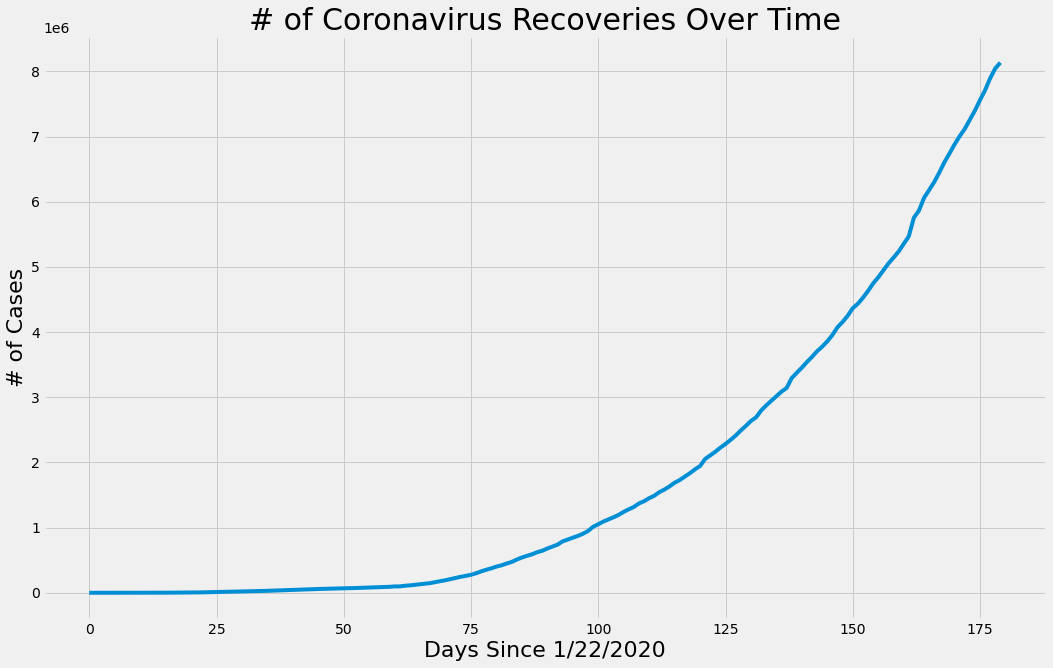

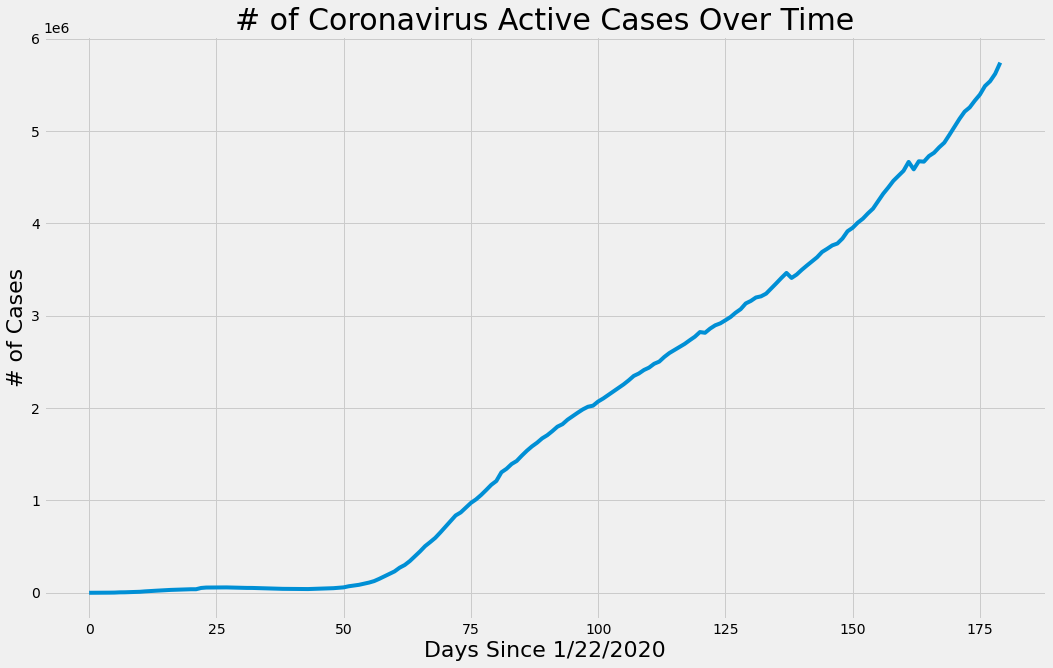

In [14]:
for v, t in zip(list_df, list_name):
    plt.figure(figsize = (16, 10))
    v.Number.plot()
    plt.title(f'# of Coronavirus {t} Over Time', fontsize = 30)
    plt.xlabel('Days Since 1/22/2020', fontsize = 22)
    plt.ylabel('# of Cases', fontsize = 22)
    

## Problem 4
    Calculate the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units).

In [15]:
total_cases_df['Daily'] = total_cases_df.Number.diff().fillna(0)
total_deaths_df['Daily'] = total_deaths_df.Number.diff().fillna(0)
total_recovered_df['Daily'] = total_recovered_df.Number.diff().fillna(0)
total_active_df['Daily'] = total_active_df.Number.diff().fillna(0)

In [16]:
total_cases_df

Day    Number     Daily
0    1/22/20       557       0.0
1    1/23/20       655      98.0
2    1/24/20       941     286.0
3    1/25/20      1434     493.0
4    1/26/20      2118     684.0
..       ...       ...       ...
175  7/15/20  13568316  231226.0
176  7/16/20  13819907  251591.0
177  7/17/20  14061989  242082.0
178  7/18/20  14299993  238004.0
179  7/19/20  14514204  214211.0

[180 rows x 3 columns]

## Problem 5
    Visualize the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.

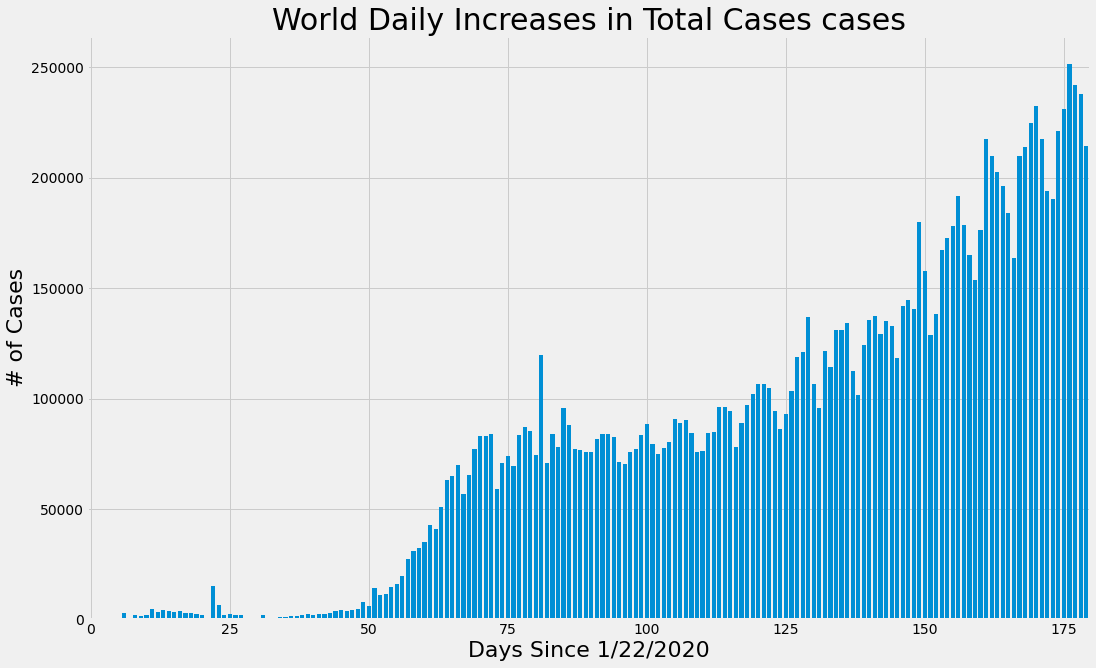

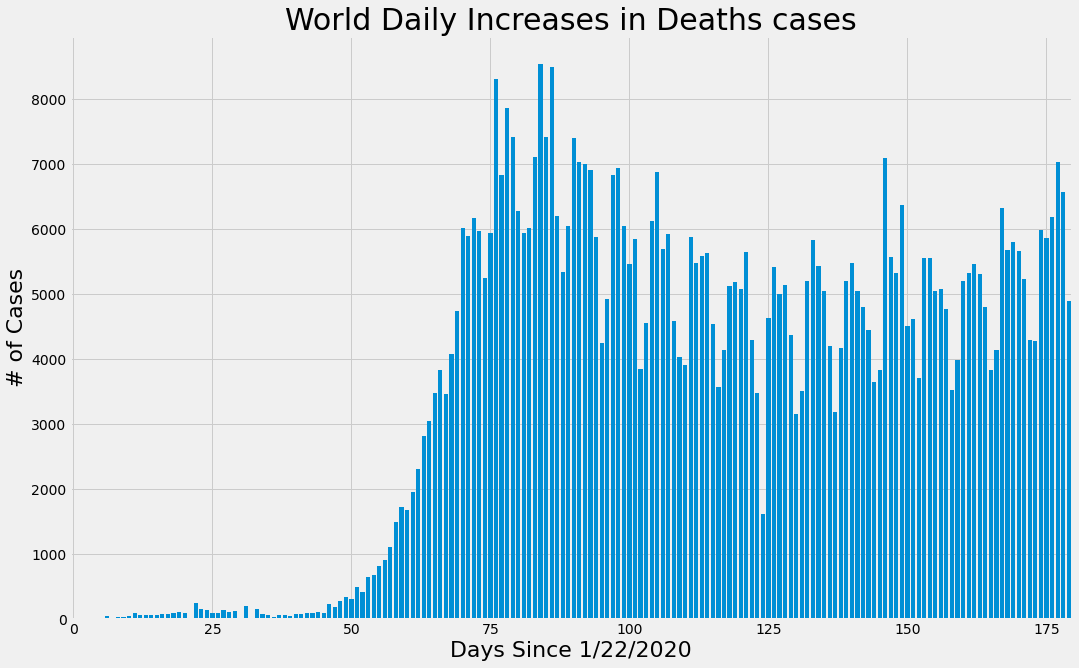

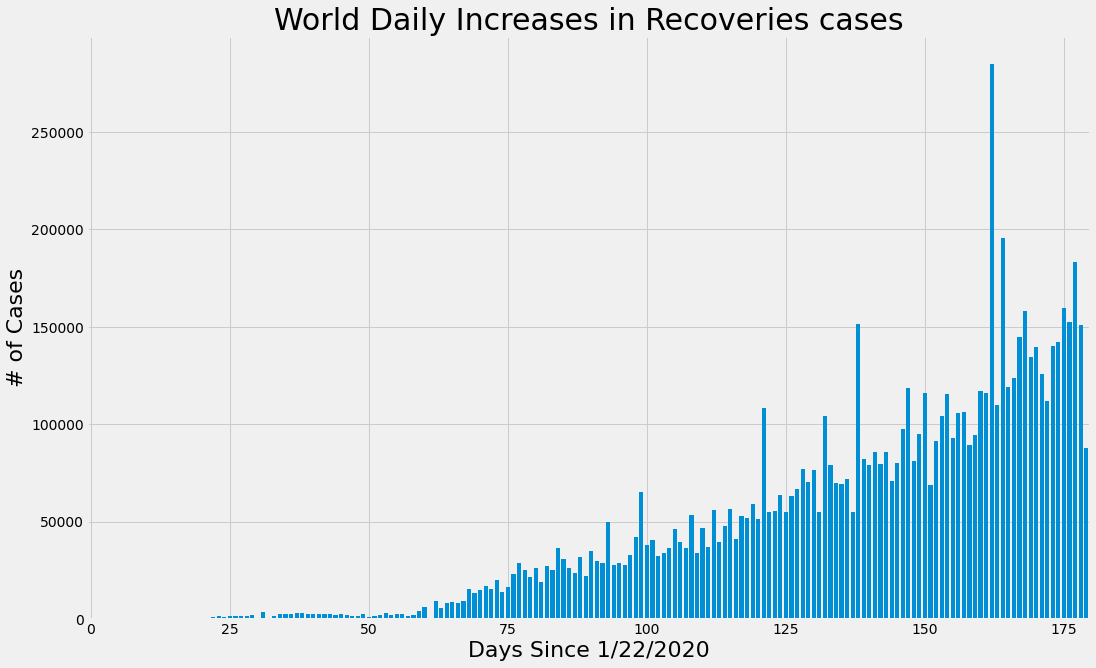

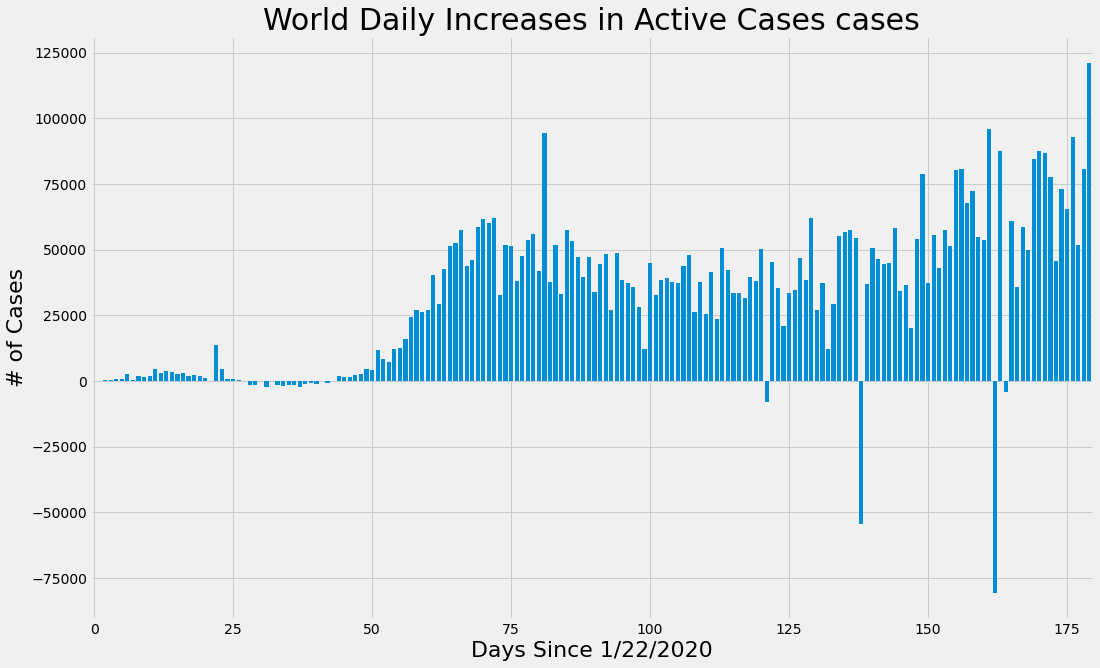

In [17]:
for v, t in zip(list_df, list_name):
    plt.figure(figsize = (16, 10))   
    v.Daily.plot(kind = 'bar', width = 0.75)
    plt.title(f'World Daily Increases in {t} cases', fontsize = 30)
    plt.xlabel('Days Since 1/22/2020', fontsize = 22)
    plt.ylabel('# of Cases', fontsize = 22)  
    plt.xticks(range(0, len(v), 25), rotation = 0)

# Problem 6:
    Calculate the global mortality and recovered rate in percentage by time.

In [18]:
mortality_rate.mean()

5.021544536071244

In [19]:
#Insert your code here:
mortality_rate = total_deaths*100/total_cases
mortality_rate_df = mortality_rate.to_frame().reset_index()
mortality_rate_df.columns = ['Day', 'Pecent']
recovery_rate = total_recovered*100/total_cases
recovery_rate_df = recovery_rate.to_frame().reset_index()
recovery_rate_df.columns = ['Day', 'Percent']
mortality_average = mortality_rate.mean()
recovery_average = recovery_rate.mean()

In [20]:
mortality_rate_df

Day    Pecent
0    1/22/20  3.052065
1    1/23/20  2.748092
2    1/24/20  2.763018
3    1/25/20  2.928870
4    1/26/20  2.644004
..       ...       ...
175  7/15/20  4.525646
176  7/16/20  4.488033
177  7/17/20  4.460820
178  7/18/20  4.432569
179  7/19/20  4.400917

[180 rows x 2 columns]

# Problem 7
**7.1** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

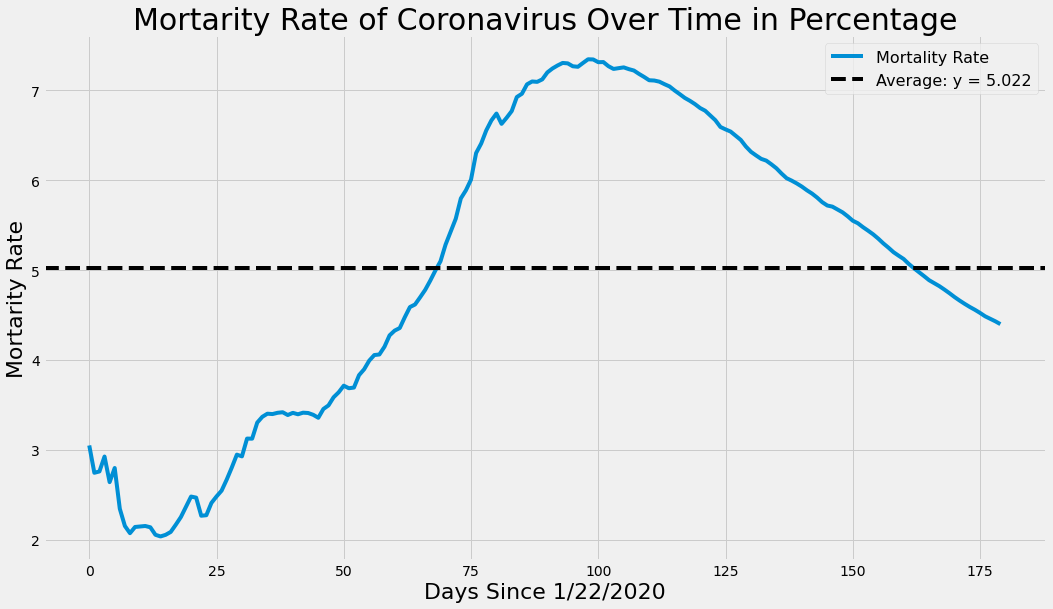

In [21]:
mortality_rate_df.Pecent.plot(figsize = (16, 9), label = 'Mortality Rate')
plt.axhline(y = mortality_average, ls = '--', color = 'k', label = f'Average: y = {mortality_average:.3f}')
plt.title('Mortarity Rate of Coronavirus Over Time in Percentage', fontsize = 30)
plt.xlabel('Days Since 1/22/2020', fontsize = 22)
plt.ylabel('Mortarity Rate', fontsize = 22)
plt.legend(fontsize = 16);

**7.2** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

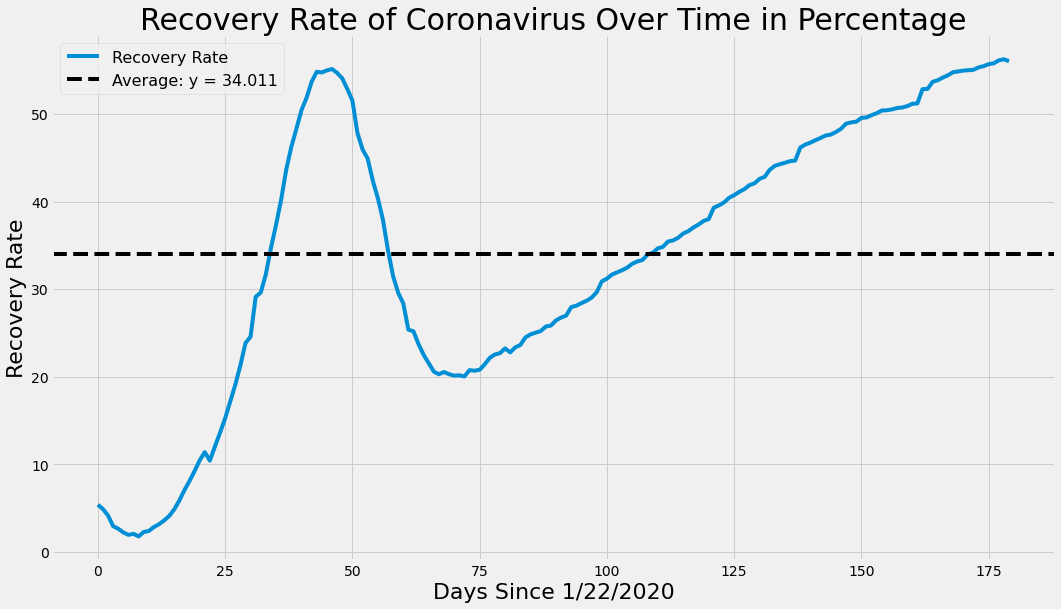

In [22]:
recovery_rate_df.Percent.plot(figsize = (16, 9), label = 'Recovery Rate')
plt.axhline(y = recovery_average, ls = '--', color = 'k', label = f'Average: y = {recovery_average:.3f}')
plt.title('Recovery Rate of Coronavirus Over Time in Percentage', fontsize = 30)
plt.xlabel('Days Since 1/22/2020', fontsize = 22)
plt.ylabel('Recovery Rate', fontsize = 22)
plt.legend(fontsize = 16);

#  5. Continent Analysis

## Data Prerocessing

In [23]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Problem 8
    Add the field "continent" into the confirm_df, deaths_df and recorveries_df dataset:

In [24]:
list_df = [confirmed_df, deaths_df, recoveries_df]
for i in list_df:
    tobe_insert = i['Country/Region'].map(lambda x: continents[country_to_continent_code(x)])
    i.insert(2, 'continent', tobe_insert)

In [25]:
deaths_df.head()

Province/State Country/Region continent       Lat       Long  1/22/20  \
0            NaN    Afghanistan      Asia  33.93911  67.709953        0   
1            NaN        Albania    Europe  41.15330  20.168300        0   
2            NaN        Algeria    Africa  28.03390   1.659600        0   
3            NaN        Andorra    Europe  42.50630   1.521800        0   
4            NaN         Angola    Africa -11.20270  17.873900        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  7/10/20  7/11/20  7/12/20  \
0        0        0        0        0  ...      975      979     1014   
1        0        0        0        0  ...       85       89       93   
2        0        0        0        0  ...      996     1004     1011   
3        0        0        0        0  ...       52       52       52   
4        0        0        0        0  ...       23       23       26   

   7/13/20  7/14/20  7/15/20  7/16/20  7/17/20  7/18/20  7/19/20  
0     1016     1049     1098     1117     1151     1151     1185  
1       95       97      101      104      107      111      112  
2     1018     1028     1040     1052     1057     1068     1078  
3       52       52       52       52       52       52       52  
4       26       26       27       28       29       29       29  

[5 rows x 185 columns]

In [26]:
recoveries_df.head()

Province/State Country/Region continent       Lat       Long  1/22/20  \
0            NaN    Afghanistan      Asia  33.93911  67.709953        0   
1            NaN        Albania    Europe  41.15330  20.168300        0   
2            NaN        Algeria    Africa  28.03390   1.659600        0   
3            NaN        Andorra    Europe  42.50630   1.521800        0   
4            NaN         Angola    Africa -11.20270  17.873900        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  7/10/20  7/11/20  7/12/20  \
0        0        0        0        0  ...    20882    21135    21216   
1        0        0        0        0  ...     1875     1881     1946   
2        0        0        0        0  ...    13124    13124    13743   
3        0        0        0        0  ...      803      803      803   
4        0        0        0        0  ...      117      118      118   

   7/13/20  7/14/20  7/15/20  7/16/20  7/17/20  7/18/20  7/19/20  
0    21254    21454    22456    22824    23151    23273    23634  
1     2014     2062     2091     2137     2214     2264     2311  
2    14019    14295    14792    15107    15430    15744    16051  
3      803      803      803      803      803      803      803  
4      118      118      124      124      199      210      221  

[5 rows x 185 columns]

In [27]:
confirmed_df.head()

Province/State Country/Region continent       Lat       Long  1/22/20  \
0            NaN    Afghanistan      Asia  33.93911  67.709953        0   
1            NaN        Albania    Europe  41.15330  20.168300        0   
2            NaN        Algeria    Africa  28.03390   1.659600        0   
3            NaN        Andorra    Europe  42.50630   1.521800        0   
4            NaN         Angola    Africa -11.20270  17.873900        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  7/10/20  7/11/20  7/12/20  \
0        0        0        0        0  ...    34280    34437    34537   
1        0        0        0        0  ...     3278     3371     3454   
2        0        0        0        0  ...    18242    18712    19195   
3        0        0        0        0  ...      855      855      855   
4        0        0        0        0  ...      458      462      506   

   7/13/20  7/14/20  7/15/20  7/16/20  7/17/20  7/18/20  7/19/20  
0    34541    34826    35026    35156    35315    35375    35561  
1     3571     3667     3752     3851     3906     4008     4090  
2    19689    20216    20770    21355    21948    22549    23084  
3      858      861      862      877      880      880      880  
4      525      541      576      607      638      687      705  

[5 rows x 185 columns]

# Problem 9
    Create the countries_df data frame with the index as the "Country/Region" field.
    These column infor will be: 
    - continent: Country continent.
    - Deaths: Total number of confirmed.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

Lets check the shape of the data frames

In [28]:
print(confirmed_df.shape)
print(deaths_df.shape)
print(recoveries_df.shape)

(279, 185)
(279, 185)
(264, 185)


We can see that the shape of recoveries_df is smaller than other 2. So, we need to be careful when combie 3 dataframes to create countries_df dataframe.

In [29]:
#create a dataframe store info of all countries
total_df = confirmed_df[['Country/Region', 'Lat', 'Long', 'continent']].copy()
total_df['Confirmed'] = confirmed_df.iloc[:,-1] #Total number of confirmed
total_df['Deaths'] = deaths_df.iloc[:,-1] #Total number of deaths
total_df = total_df.groupby(by = ['Country/Region', 'continent'], as_index= False).agg({'Lat': 'mean', 'Long': 'mean', 'Confirmed': 'sum', 'Deaths': 'sum'})
total_df.set_index(keys = 'Country/Region', inplace = True)
total_df['Recoveries'] = recoveries_df[['Country/Region', '7/19/20']].groupby(by = 'Country/Region').sum() #Total number of recoveried
total_df['Active'] = total_df['Confirmed'] - total_df['Deaths'] - total_df['Recoveries']
total_df['Mortality Rate'] = total_df['Deaths']*100/total_df['Confirmed']
total_df

continent        Lat        Long  Confirmed  Deaths  \
Country/Region                                                           
Afghanistan             Asia  33.939110   67.709953      35561    1185   
Albania               Europe  41.153300   20.168300       4090     112   
Algeria               Africa  28.033900    1.659600      23084    1078   
Andorra               Europe  42.506300    1.521800        880      52   
Angola                Africa -11.202700   17.873900        705      29   
...                      ...        ...         ...        ...     ...   
Vietnam                 Asia  14.058324  108.277199        383       0   
West Bank and Gaza    Others  31.952200   35.233200       8549      62   
Yemen                   Asia  15.552727   48.516388       1606     445   
Zambia                Africa -13.133897   27.849332       2980     120   
Zimbabwe              Africa -19.015438   29.154857       1611      25   

                    Recoveries  Active  Mortality Rate  
Country/Region                                          
Afghanistan              23634   10742        3.332302  
Albania                   2311    1667        2.738386  
Algeria                  16051    5955        4.669901  
Andorra                    803      25        5.909091  
Angola                     221     455        4.113475  
...                        ...     ...             ...  
Vietnam                    357      26        0.000000  
West Bank and Gaza        1921    6566        0.725231  
Yemen                      712     449       27.708593  
Zambia                    1462    1398        4.026846  
Zimbabwe                   472    1114        1.551831  

[195 rows x 8 columns]

In [30]:
#Create the countries_df data frame 
countries_df = total_df.drop(['continent'], axis = 1)
countries_df

Lat        Long  Confirmed  Deaths  Recoveries  \
Country/Region                                                             
Afghanistan         33.939110   67.709953      35561    1185       23634   
Albania             41.153300   20.168300       4090     112        2311   
Algeria             28.033900    1.659600      23084    1078       16051   
Andorra             42.506300    1.521800        880      52         803   
Angola             -11.202700   17.873900        705      29         221   
...                       ...         ...        ...     ...         ...   
Vietnam             14.058324  108.277199        383       0         357   
West Bank and Gaza  31.952200   35.233200       8549      62        1921   
Yemen               15.552727   48.516388       1606     445         712   
Zambia             -13.133897   27.849332       2980     120        1462   
Zimbabwe           -19.015438   29.154857       1611      25         472   

                    Active  Mortality Rate  
Country/Region                              
Afghanistan          10742        3.332302  
Albania               1667        2.738386  
Algeria               5955        4.669901  
Andorra                 25        5.909091  
Angola                 455        4.113475  
...                    ...             ...  
Vietnam                 26        0.000000  
West Bank and Gaza    6566        0.725231  
Yemen                  449       27.708593  
Zambia                1398        4.026846  
Zimbabwe              1114        1.551831  

[195 rows x 7 columns]

# Problem 10
    Create the continents_df data frame with the index as the "continent" field.
    These column infor will be: 
    - Confirmed: Country continent.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [31]:
#Need to re-calculate mortality rate
continents_df = total_df[['continent', 'Confirmed', 'Deaths', 'Recoveries', 'Active']].groupby(by = 'continent').sum()
continents_df['Mortality Rate'] = continents_df['Deaths']*100/continents_df['Confirmed']
continents_df

Confirmed  Deaths  Recoveries   Active  Mortality Rate
continent                                                            
Africa            721049   15169      380245   325635        2.103741
Asia             3393393   80131     2411307   901955        2.361383
Australia          13666     145        9927     3594        1.061027
Europe           2659580  194579     1535087   929914        7.316155
North America    4452566  194420     1584688  2673458        4.366471
Others             15382     218        5852     9312        1.417241
South America    3258568  154096     2206775   897697        4.728948

## Sample line ploting
Here are the sample functions for visualizing covid cases by time in each continent/country:

In [32]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', 
             transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        


# Problem 11
**11.1** 

    Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed. 
    

In [33]:
#sort the continent dataframe by number of confirmed
continents_df.sort_values(by = 'Confirmed', ascending=False, inplace = True)

In [34]:
continents_df

Confirmed  Deaths  Recoveries   Active  Mortality Rate
continent                                                            
North America    4452566  194420     1584688  2673458        4.366471
Asia             3393393   80131     2411307   901955        2.361383
South America    3258568  154096     2206775   897697        4.728948
Europe           2659580  194579     1535087   929914        7.316155
Africa            721049   15169      380245   325635        2.103741
Others             15382     218        5852     9312        1.417241
Australia          13666     145        9927     3594        1.061027

In [35]:
#list of continents
continents = continents_df.index

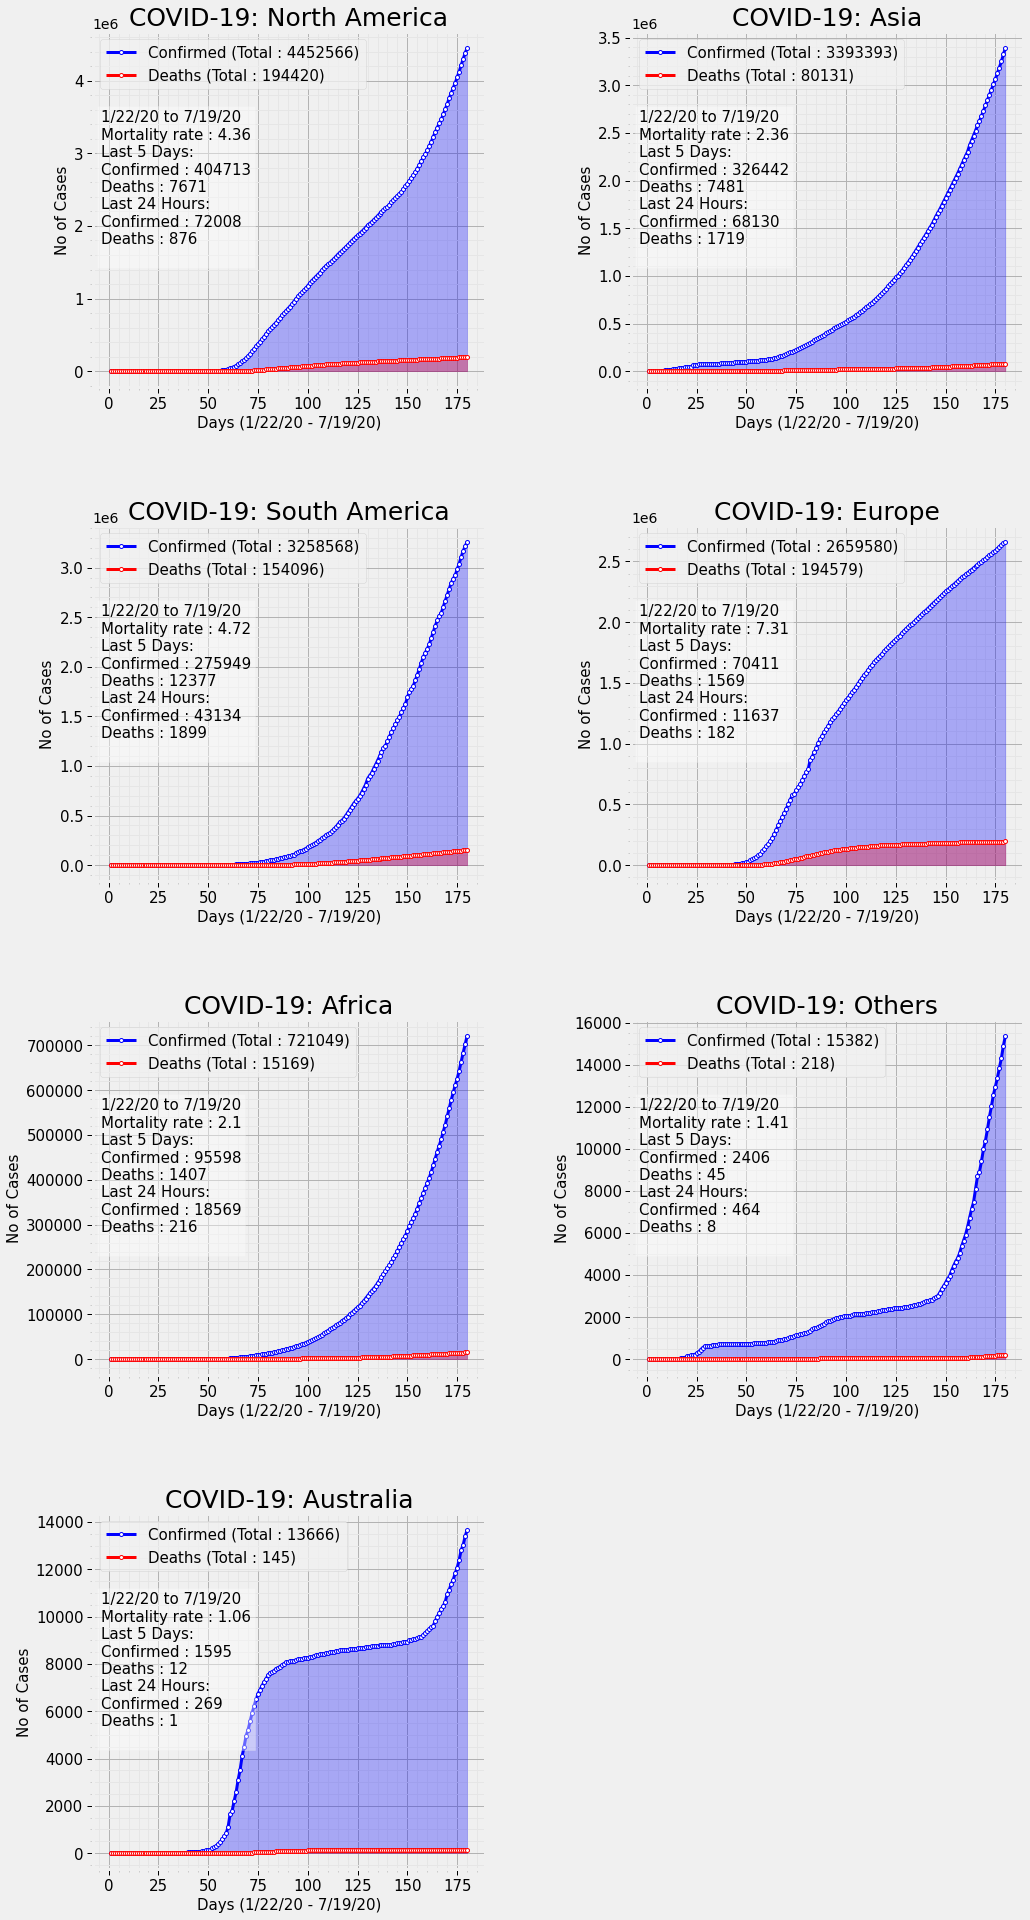

In [36]:
figure = plt.figure(figsize = (18, 30))
for u, v in enumerate(continents):
    visualize_covid_cases(confirmed_df, deaths_df, continent = v, figure = [figure, 4, 2, u + 1])


**11.2**

    Modify the "plot_params" and "visualize_covid_cases" function to: 
    - Show up the results of the last 7 days instead of 5 days.
    - Add the "Recoveries line" to the main chart.
    - Add the "Total Recoveries" number to the small table.
    - Add the "Recoveries" filed in the last 7 days and 24 hours to the information menu.

In [37]:
recoveries_df

Province/State      Country/Region continent        Lat        Long  \
0              NaN         Afghanistan      Asia  33.939110   67.709953   
1              NaN             Albania    Europe  41.153300   20.168300   
2              NaN             Algeria    Africa  28.033900    1.659600   
3              NaN             Andorra    Europe  42.506300    1.521800   
4              NaN              Angola    Africa -11.202700   17.873900   
..             ...                 ...       ...        ...         ...   
259            NaN             Vietnam      Asia  14.058324  108.277199   
260            NaN  West Bank and Gaza    Others  31.952200   35.233200   
261            NaN               Yemen      Asia  15.552727   48.516388   
262            NaN              Zambia    Africa -13.133897   27.849332   
263            NaN            Zimbabwe    Africa -19.015438   29.154857   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  ...  7/10/20  7/11/20  \
0          0        0        0        0        0  ...    20882    21135   
1          0        0        0        0        0  ...     1875     1881   
2          0        0        0        0        0  ...    13124    13124   
3          0        0        0        0        0  ...      803      803   
4          0        0        0        0        0  ...      117      118   
..       ...      ...      ...      ...      ...  ...      ...      ...   
259        0        0        0        0        0  ...      350      350   
260        0        0        0        0        0  ...      536      536   
261        0        0        0        0        0  ...      630      642   
262        0        0        0        0        0  ...     1348     1348   
263        0        0        0        0        0  ...      320      320   

     7/12/20  7/13/20  7/14/20  7/15/20  7/16/20  7/17/20  7/18/20  7/19/20  
0      21216    21254    21454    22456    22824    23151    23273    23634  
1       1946     2014     2062     2091     2137     2214     2264     2311  
2      13743    14019    14295    14792    15107    15430    15744    16051  
3        803      803      803      803      803      803      803      803  
4        118      118      118      124      124      199      210      221  
..       ...      ...      ...      ...      ...      ...      ...      ...  
259      350      352      352      353      356      356      357      357  
260      942     1084     1084     1084     1313     1492     1596     1921  
261      659      675      685      694      695      695      701      712  
262     1412     1412     1412     1412     1412     1450     1462     1462  
263      328      343      343      395      425      438      439      472  

[264 rows x 185 columns]

In [38]:
def visualize_covid_cases_7(confirmed, deaths, recoveried,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths, recoveried]
    label = ["Confirmed", "Deaths", 'Recovered']
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recovered = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recovered = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Recovered : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += 'Recovered :' + str(Total_recovered[-1] - Total_recovered[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()

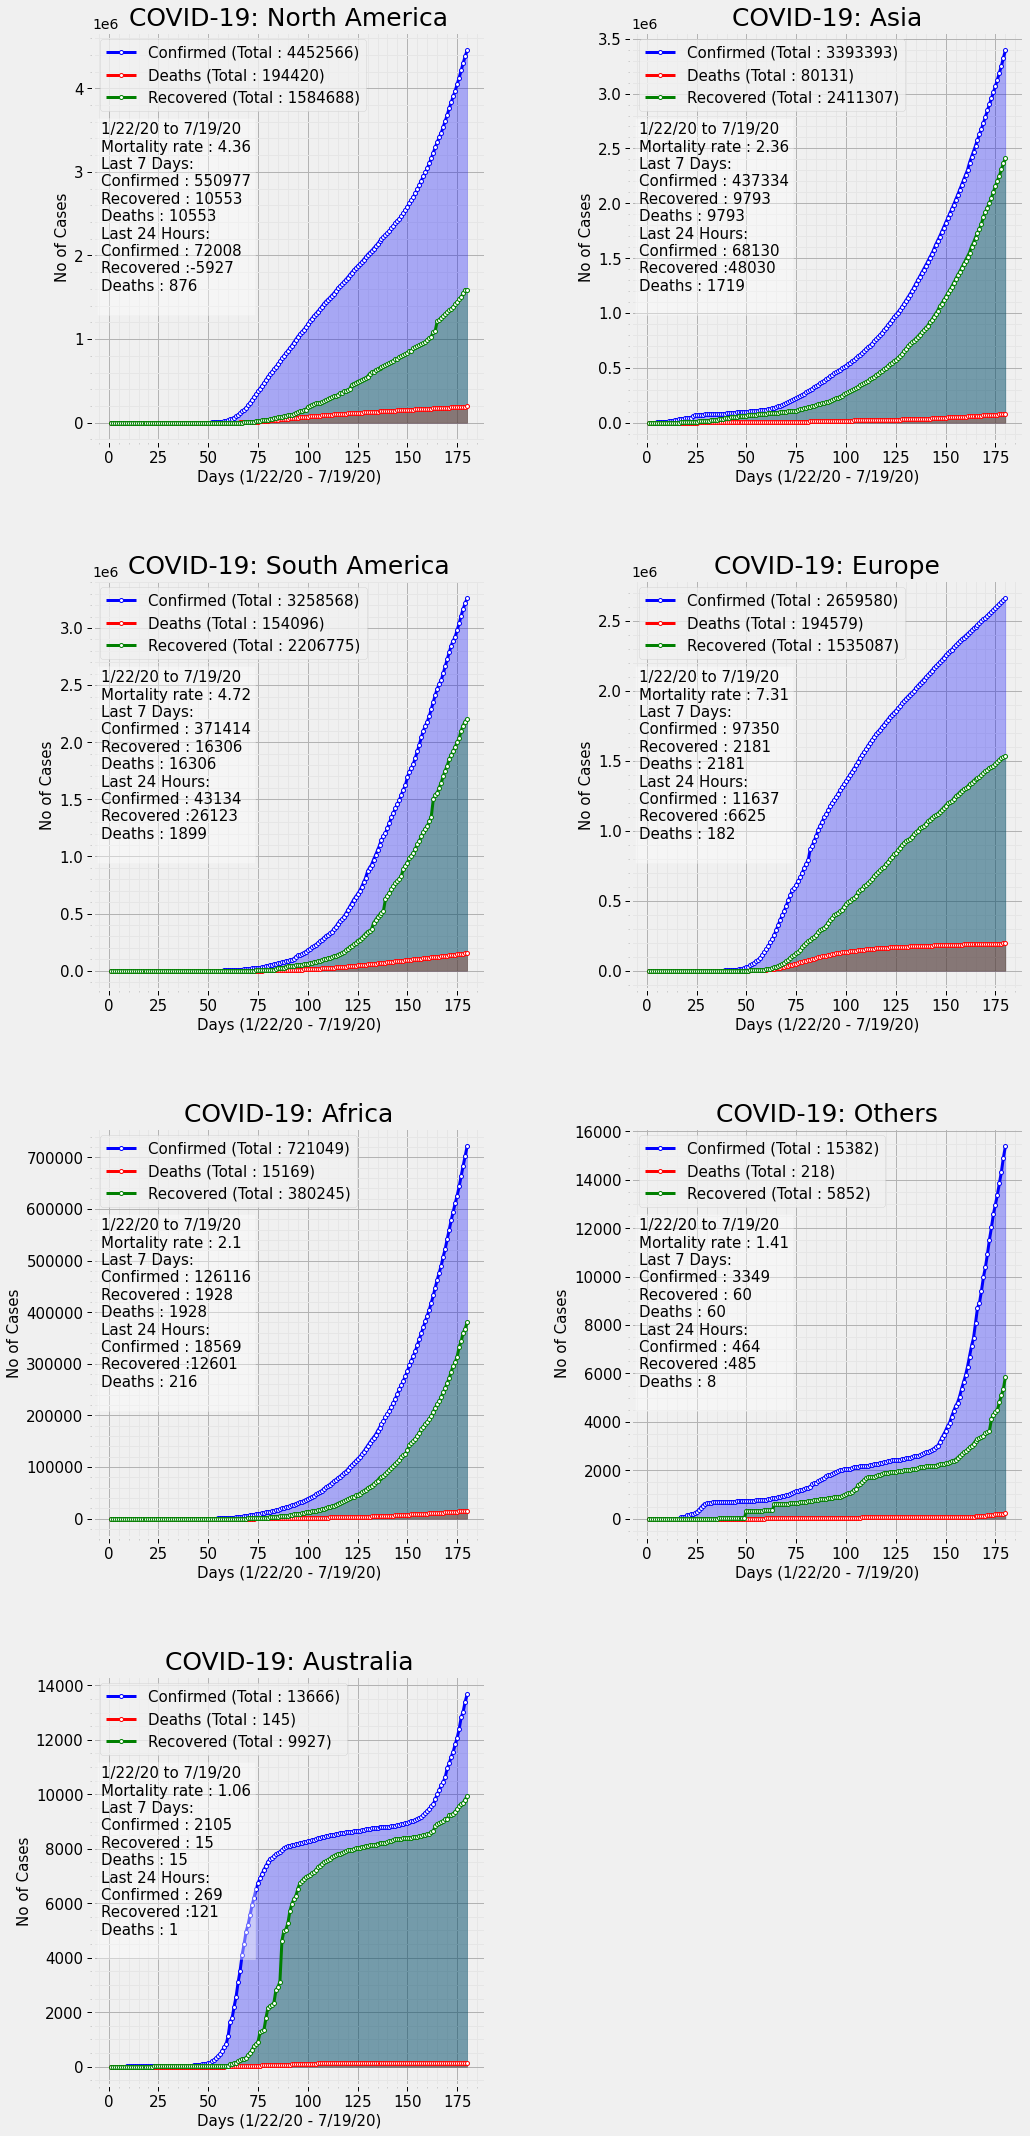

In [39]:
figure = plt.figure(figsize = (18, 33))
for u, v in enumerate(continents):
    visualize_covid_cases_7(confirmed_df, deaths_df, recoveries_df, continent = v, figure = [figure, 4, 2, u + 1])

# Problem 12
    Visualize the covariance matrix for continents_df.

<AxesSubplot:>

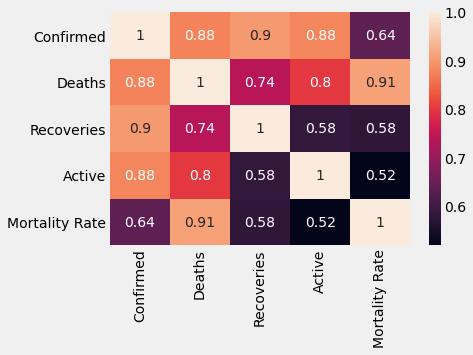

In [40]:
sns.heatmap(continents_df.corr(), annot = True)

# Problem 13
    Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents.
    Each field (confirm, deaths, ...) should be presented in different pie charts.
    You are not allowed to use repeated code snippet here, let try to use a for loop.
    Each continent should be presented in different colors.

In [41]:
continents_df.sort_index(inplace= True)

In [42]:
continents_df

Confirmed  Deaths  Recoveries   Active  Mortality Rate
continent                                                            
Africa            721049   15169      380245   325635        2.103741
Asia             3393393   80131     2411307   901955        2.361383
Australia          13666     145        9927     3594        1.061027
Europe           2659580  194579     1535087   929914        7.316155
North America    4452566  194420     1584688  2673458        4.366471
Others             15382     218        5852     9312        1.417241
South America    3258568  154096     2206775   897697        4.728948

In [43]:
continents_df.columns[:-1]

Index(['Confirmed', 'Deaths', 'Recoveries', 'Active'], dtype='object')

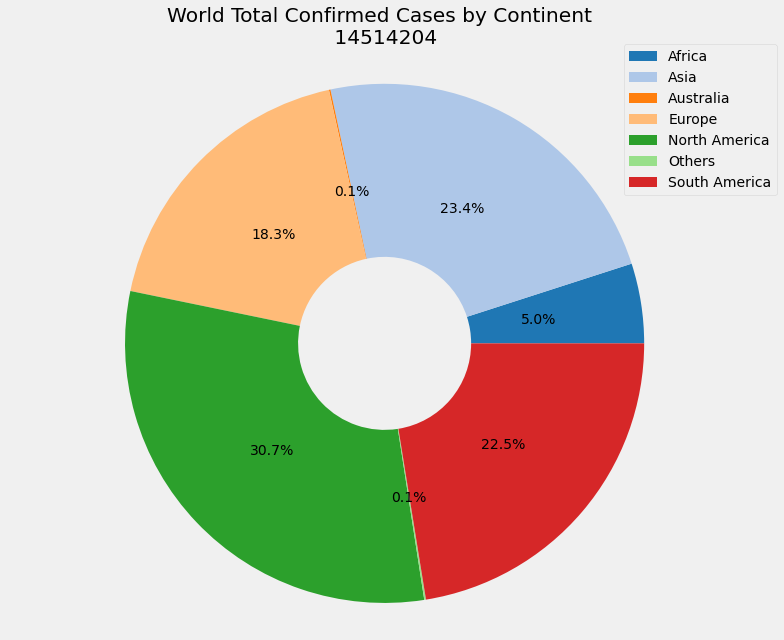

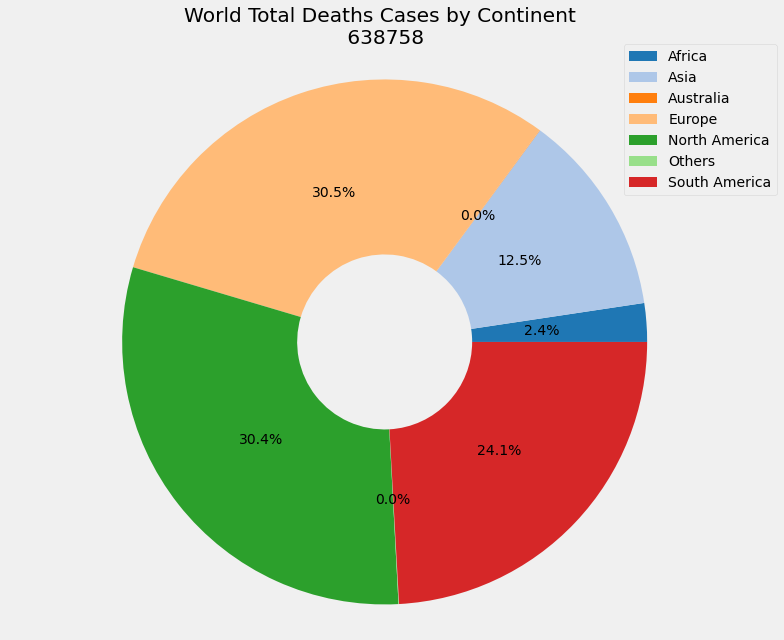

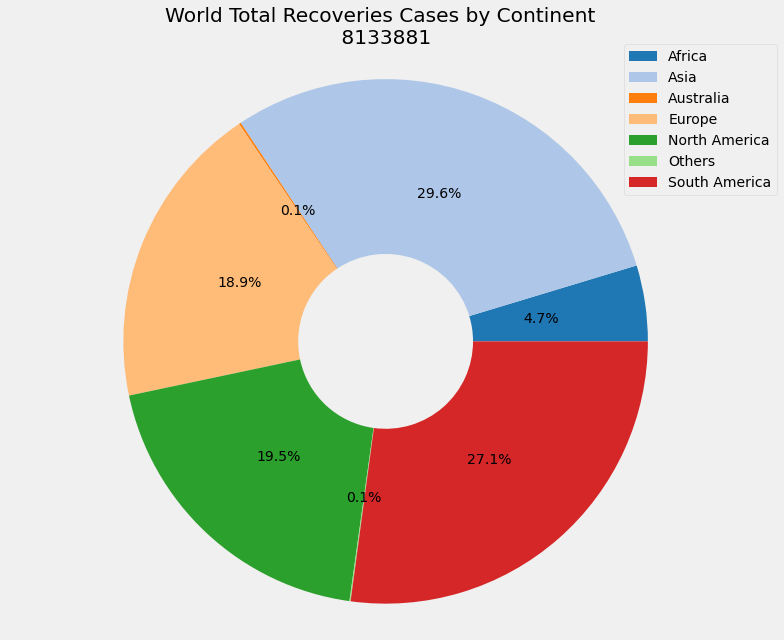

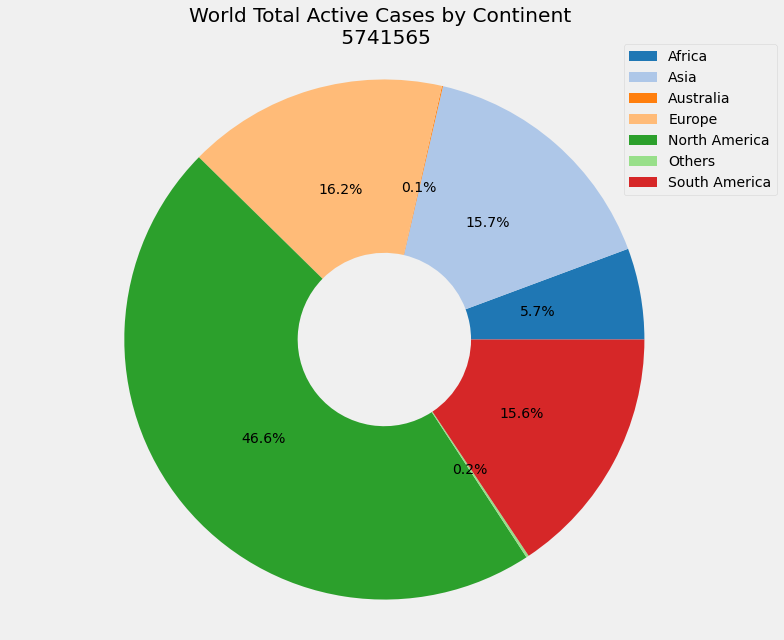

In [44]:
color = plt.cm.tab20(np.arange(7))
for i in continents_df.columns[:-1]:
    fig, ax = plt.subplots(figsize = (12,10))
    ax.pie(continents_df[i], autopct= '%.1f%%', colors = color,
          wedgeprops= dict(width = 0.6), radius = 0.9)
    ax.axis('equal')
    plt.legend(continents_df.index, loc = (0.82, 0.75))
    plt.title(f'World Total {i} Cases by Continent \n {continents_df[i].sum()}')

# 6. Country analysis

# Problem 14
    Build a folium map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the cicle is proportional to the number of confirmed.

In [45]:
world = folium.Map(location = [40, 0], zoom_start= 2)
for country in countries_df.index:
    tooltip = f'''{country},
    Confirmed: {countries_df.loc[country, 'Confirmed']},
    Deaths: {countries_df.loc[country, 'Deaths']},
    Recovered: {countries_df.loc[country, 'Recoveries']},
    Mortality rate: {countries_df.loc[country, 'Mortality Rate']}
    '''
    folium.Circle(location= [countries_df.loc[country, 'Lat'], countries_df.loc[country, 'Long']],
                 radius = countries_df.loc[country, 'Confirmed']/2.2,
                 color = 'orange',
                 fill = True,
                 fill_opacity = 0.3,
                 tooltip = tooltip).add_to(world)
world

# Problem 15
Build a px [(plotly.express)](https://plotly.com/python/plotly-express/) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

In [46]:
fig = px.choropleth(countries_df, locations = countries_df.index,
             color = np.log10(countries_df['Active'] + 1), # +1 to prevent log(0)
             hover_name = countries_df.index, 
             hover_data = ['Active'],
             color_continuous_scale = 'Spectral',
             locationmode = 'country names')
fig.update_layout(title = 'World Active Cases',
                 coloraxis_colorbar = dict(title = 'Active Cases (log scale)'))

# Problem 16
    Filter the top 10 countries based on the number of confirmed cases.

In [47]:
top10_countries = countries_df.sort_values(by = 'Confirmed', ascending = False).head(10)
top10_countries

Lat        Long  Confirmed  Deaths  Recoveries   Active  \
Country/Region                                                                  
USA             40.000000 -100.000000    3780322  141061     1131121  2508140   
Brazil         -14.235000  -51.925300    2098389   79488     1459072   559829   
India           20.593684   78.962880    1118206   27497      700087   390622   
Russia          61.524010  105.318756     770311   12323      549387   208601   
South Africa   -30.559500   22.937500     364328    5033      191059   168236   
Peru            -9.190000  -75.015200     353590   49429      241955    62206   
Mexico          23.634500 -102.552800     344224   39184      254941    50099   
Chile          -35.675100  -71.543000     330930    8503      301794    20633   
United Kingdom  21.840267  -41.440047     296358   41080        1413   253865   
Iran            32.427908   53.688046     273788   14188      237788    21812   

                Mortality Rate  
Country/Region                  
USA                   3.731455  
Brazil                3.788049  
India                 2.459028  
Russia                1.599743  
South Africa          1.381447  
Peru                 13.979185  
Mexico               11.383285  
Chile                 2.569426  
United Kingdom       13.861613  
Iran                  5.182112

# Problem 17
    Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart.

In [48]:
fig = px.bar(top10_countries.reset_index(), x = 'Country/Region', y = ['Active', 'Recoveries', 'Deaths'])
fig.update_layout(title = 'Top 10 Countries (Confirmed Cases)',
                 yaxis_title = '# of active cases',
                 legend_title = None)

# 7. Advanced Analysis
 

# Problem 18
    Based on the data visualization on global part, does the COVID 2019 epidemic in the world has reached its peak?
    Put your answer here:
    We can see in the charts that the trend is continuously upward, they seem no to reach the peak yet.

# Problem 19:
Based on the data visualization on the continent part:

    19.1 Which continent has the highest death rate over continents' active cases?

    19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?
    
    19.3 Which continent has the highest recoveries rate over continents' dataset?

(Note: COVID 2019 Spread rate = Number of new confirmed in the last 10 days / number of active before).
Put your answer here:


### 19.1
Europe is the continent has the highest death rate

In [49]:
continents_df['Mortality Rate'].sort_values(ascending = False)

continent
Europe           7.316155
South America    4.728948
North America    4.366471
Asia             2.361383
Africa           2.103741
Others           1.417241
Australia        1.061027
Name: Mortality Rate, dtype: float64

### 19.2
Australia has the highest rate on COVID 2019 spread rate (however, the number os cases here is very small compare to others)

In [50]:
continent_active_df = confirmed_df.groupby('continent').sum() - deaths_df.groupby('continent').sum() - recoveries_df.groupby('continent').sum()
continent_confirmed_df = confirmed_df.groupby('continent').sum()
continent_active_before = continent_active_df.iloc[:, -11]
continent_confirmed_10days = continent_confirmed_df.iloc[:, -1] - continent_confirmed_df.iloc[:, -10]
continent_spread_rate = continent_confirmed_10days/continent_active_before
continent_spread_rate.sort_values(ascending = False)

continent
Australia        1.467555
Asia             0.682793
Others           0.659098
Africa           0.606368
South America    0.588310
North America    0.317961
Europe           0.135056
dtype: float64

### 19.3
Australia has the highest recoveries rate

In [51]:
continents_recoveries_rate = continents_df.Recoveries/continents_df.Confirmed
continents_recoveries_rate.sort_values(ascending = False)

continent
Australia        0.726401
Asia             0.710589
South America    0.677222
Europe           0.577192
Africa           0.527350
Others           0.380445
North America    0.355904
dtype: float64

# Problem 20
Based on the data visualization on the country part:

    20.1 Which country has the highest death rate over countries' dataset?

    20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?
    
    20.3 Which country has the highest recoveries rate over countries' dataset?
Put your answer here:

### 20.1
Yemen is the country has the highest death rate

In [52]:
countries_df['Mortality Rate'].sort_values(ascending = False)

Country/Region
Yemen                   27.708593
MS Zaandam              22.222222
Belgium                 15.383166
Italy                   14.337203
France                  14.080811
                          ...    
Palau                         NaN
Samoa                         NaN
Solomon Islands               NaN
Summer Olympics 2020          NaN
Vanuatu                       NaN
Name: Mortality Rate, Length: 195, dtype: float64

### 20.2
Andorra has the highest rate on COVID 2019 spread rate.

In [53]:
country_active_df = confirmed_df.groupby('Country/Region').sum() - deaths_df.groupby('Country/Region').sum() - recoveries_df.groupby('Country/Region').sum()
country_confirmed_df = confirmed_df.groupby('Country/Region').sum()
country_active_before = country_active_df.iloc[:, -11]
country_confirmed_10days = country_confirmed_df.iloc[:, -1] - country_confirmed_df.iloc[:, -10]
country_spread_rate = country_confirmed_10days/country_active_before
country_spread_rate.sort_values(ascending = False)

Country/Region
Saint Vincent and the Grenadines          inf
Andorra                             25.000000
Barbados                             7.000000
Bahamas                              6.428571
Cambodia                             3.000000
                                      ...    
Samoa                                     NaN
Solomon Islands                           NaN
Summer Olympics 2020                      NaN
Timor-Leste                               NaN
Vanuatu                                   NaN
Length: 195, dtype: float64

country_spread_rate

### 20.3
Those countires have the highest recoveries rate, which is 100%: Dominica, Grenada, Holy See, Laos, Timor-Leste

In [54]:
country_recoveries_rate = countries_df.Recoveries/countries_df.Confirmed
country_recoveries_rate[country_recoveries_rate == 1]

Country/Region
Dominica       1.0
Grenada        1.0
Holy See       1.0
Laos           1.0
Timor-Leste    1.0
dtype: float64

# Problem 21
**USA dataset**

In [55]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

In [56]:
us_medical_data.head()

Province_State Country_Region          Last_Update      Lat     Long_  \
0         Alabama             US  2020-07-07 04:34:13  32.3182  -86.9023   
1          Alaska             US  2020-07-07 04:34:13  61.3707 -152.4044   
2  American Samoa             US  2020-07-07 04:34:13 -14.2710 -170.1320   
3         Arizona             US  2020-07-07 04:34:13  33.7298 -111.4312   
4        Arkansas             US  2020-07-07 04:34:13  34.9697  -92.3731   

   Confirmed  Deaths  Recovered   Active  FIPS  Incident_Rate  People_Tested  \
0      44932    1007    22082.0  21789.0     1     915.282617       663719.0   
1       1184      16      548.0    598.0     2     158.841903       123753.0   
2          0       0        NaN      0.0    60       0.000000          696.0   
3     101455    1829    11836.0  87790.0     4    1393.858286       873294.0   
4      24253     292    17834.0   6127.0     5     803.663856       344968.0   

   People_Hospitalized  Mortality_Rate       UID ISO3  Testing_Rate  \
0               2914.0        2.243861  84000001  USA  13536.486998   
1                  NaN        1.376936  84000002  USA  16916.662680   
2                  NaN             NaN        16  ASM   1250.876152   
3               5188.0        1.802770  84000004  USA   8488.322873   
4               1575.0        1.203975  84000005  USA  11431.093603   

   Hospitalization_Rate  
0              6.493159  
1                   NaN  
2                   NaN  
3              5.113597  
4              6.494042

In [57]:
us_medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             48 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   36 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

Based on the USA data:

    21.1 Which state has the highest death rate over states' dataset?

    21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
    
    21.3 Which state has the highest recoveries rate over states' dataset?

### 21.1
Connecticut is the state has the highest death rate.

In [58]:
us_medical_data[['Province_State', 'Mortality_Rate']].sort_values(by = 'Mortality_Rate', ascending = False)

Province_State  Mortality_Rate
7                Connecticut        9.234503
34                New Jersey        8.771910
26                  Michigan        8.490862
36                  New York        8.102372
25             Massachusetts        7.443457
43              Pennsylvania        7.101998
33             New Hampshire        6.459249
39  Northern Mariana Islands        6.451613
45              Rhode Island        5.650050
18                   Indiana        5.560135
52            Virgin Islands        5.357143
10      District of Columbia        5.335235
40                      Ohio        5.050383
22                 Louisiana        4.969319
6                   Colorado        4.938668
17                  Illinois        4.751632
24                  Maryland        4.643511
51                   Vermont        4.476419
29                  Missouri        4.341002
8                   Delaware        4.164972
27                 Minnesota        3.917654
35                New Mexico        3.812838
54                Washington        3.701501
28               Mississippi        3.564002
21                  Kentucky        3.457323
23                     Maine        3.184341
12                   Georgia        2.965054
13            Grand Princess        2.912621
53                  Virginia        2.803243
55             West Virginia        2.760023
56                 Wisconsin        2.482767
41                  Oklahoma        2.438577
5                 California        2.376446
32                    Nevada        2.344057
19                      Iowa        2.276592
0                    Alabama        2.243861
38              North Dakota        2.078462
42                    Oregon        2.068302
37            North Carolina        1.915079
15                    Hawaii        1.844660
30                   Montana        1.841473
11                   Florida        1.830010
44               Puerto Rico        1.805475
3                    Arizona        1.802770
46            South Carolina        1.783096
20                    Kansas        1.712946
14                      Guam        1.661130
31                  Nebraska        1.411753
1                     Alaska        1.376936
47              South Dakota        1.365236
49                     Texas        1.301777
48                 Tennessee        1.252906
4                   Arkansas        1.203975
57                   Wyoming        1.194030
16                     Idaho        1.167412
50                      Utah        0.746005
9           Diamond Princess        0.000000
2             American Samoa             NaN

### 20.2
Since we dont have time data so this question can not be answered based on this dataset.

### 20.3
Minnesota is the state has the highest recoveries rate

In [59]:
us_medical_data['us_recoveries_rate'] = us_medical_data.Recovered/us_medical_data.Confirmed
us_medical_data[['Province_State', 'us_recoveries_rate']].sort_values(by = 'us_recoveries_rate', ascending = False)

Province_State  us_recoveries_rate
27                 Minnesota            0.879126
38              North Dakota            0.870356
47              South Dakota            0.853343
25             Massachusetts            0.845828
51                   Vermont            0.816946
23                     Maine            0.814198
33             New Hampshire            0.792019
19                      Iowa            0.791013
56                 Wisconsin            0.787312
41                  Oklahoma            0.759809
18                   Indiana            0.758140
15                    Hawaii            0.754369
43              Pennsylvania            0.740125
37            North Carolina            0.739793
4                   Arkansas            0.735332
55             West Virginia            0.731551
31                  Nebraska            0.730370
26                  Michigan            0.721211
28               Mississippi            0.709185
52            Virgin Islands            0.705357
40                      Ohio            0.704207
57                   Wyoming            0.699701
22                 Louisiana            0.648695
39  Northern Mariana Islands            0.612903
48                 Tennessee            0.596091
14                      Guam            0.594684
50                      Utah            0.567278
8                   Delaware            0.551371
30                   Montana            0.542834
49                     Texas            0.502795
0                    Alabama            0.491454
1                     Alaska            0.462838
35                New Mexico            0.433849
46            South Carolina            0.366408
16                     Idaho            0.358420
21                  Kentucky            0.278976
42                    Oregon            0.273785
36                  New York            0.178650
34                New Jersey            0.175829
7                Connecticut            0.174770
10      District of Columbia            0.147694
6                   Colorado            0.134367
53                  Virginia            0.133264
3                    Arizona            0.116663
45              Rhode Island            0.097522
24                  Maryland            0.071942
20                    Kansas            0.051629
32                    Nevada            0.032389
2             American Samoa                 NaN
5                 California                 NaN
9           Diamond Princess                 NaN
11                   Florida                 NaN
12                   Georgia                 NaN
13            Grand Princess                 NaN
17                  Illinois                 NaN
29                  Missouri                 NaN
44               Puerto Rico                 NaN
54                Washington                 NaN

# Problem 22
Build a regression model (or more than 1 model) to predict the number of new confirmed in the top 10 states which have the highest number of confirmed cases in the USA.

The dataset is a set of data at a time, which is '2020-07-07 04:34:13', for precise. So, from the problem, I can understand that it required a model to predict the confirmed cases in the top 10 states at that time, based on other infomations (maybe number of deaths or recovered...), and this model is not used to predict new cases in the future. It seems that this model is not very useful, and the data that we have is very small (only 58 rows, before processing). But, I will try to build one, anyway.

In [75]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

In [76]:
#set the state for index
us_medical_data.set_index('Province_State', inplace = True)
us_medical_data.head()

Country_Region          Last_Update      Lat     Long_  \
Province_State                                                          
Alabama                    US  2020-07-07 04:34:13  32.3182  -86.9023   
Alaska                     US  2020-07-07 04:34:13  61.3707 -152.4044   
American Samoa             US  2020-07-07 04:34:13 -14.2710 -170.1320   
Arizona                    US  2020-07-07 04:34:13  33.7298 -111.4312   
Arkansas                   US  2020-07-07 04:34:13  34.9697  -92.3731   

                Confirmed  Deaths  Recovered   Active  FIPS  Incident_Rate  \
Province_State                                                               
Alabama             44932    1007    22082.0  21789.0     1     915.282617   
Alaska               1184      16      548.0    598.0     2     158.841903   
American Samoa          0       0        NaN      0.0    60       0.000000   
Arizona            101455    1829    11836.0  87790.0     4    1393.858286   
Arkansas            24253     292    17834.0   6127.0     5     803.663856   

                People_Tested  People_Hospitalized  Mortality_Rate       UID  \
Province_State                                                                 
Alabama              663719.0               2914.0        2.243861  84000001   
Alaska               123753.0                  NaN        1.376936  84000002   
American Samoa          696.0                  NaN             NaN        16   
Arizona              873294.0               5188.0        1.802770  84000004   
Arkansas             344968.0               1575.0        1.203975  84000005   

               ISO3  Testing_Rate  Hospitalization_Rate  
Province_State                                           
Alabama         USA  13536.486998              6.493159  
Alaska          USA  16916.662680                   NaN  
American Samoa  ASM   1250.876152                   NaN  
Arizona         USA   8488.322873              5.113597  
Arkansas        USA  11431.093603              6.494042

Look at the data, we can see that there are some features we will not use for the model. I will just drop them.

In [77]:
us_medical_data.drop(labels = ['Country_Region', 'Last_Update', 'FIPS', 'UID', 'ISO3'], axis = 1, inplace = True)

Now, I will check for missing data

In [78]:
us_medical_data.isna().sum(axis = 0)

Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               10
Active                   0
Incident_Rate            2
People_Tested            2
People_Hospitalized     22
Mortality_Rate           1
Testing_Rate             2
Hospitalization_Rate    22
dtype: int64

Since the missing data ratio of 'People_Hospitalized' and 'Hospitalization_Rate' are way too high (22/58), and we can not just guest those number, so I will drop these 2 features.

In [79]:
us_medical_data.drop(labels = ['People_Hospitalized', 'Hospitalization_Rate'], axis = 1, inplace = True)


Lets check what data missing with 'Lat' and 'Long_' feature

In [80]:
us_medical_data[us_medical_data.Lat.isna() | us_medical_data.Long_.isna()]

Lat  Long_  Confirmed  Deaths  Recovered  Active  \
Province_State                                                       
Diamond Princess  NaN    NaN         49       0        NaN    49.0   
Grand Princess    NaN    NaN        103       3        NaN   100.0   

                  Incident_Rate  People_Tested  Mortality_Rate  Testing_Rate  
Province_State                                                                
Diamond Princess            NaN            NaN        0.000000           NaN  
Grand Princess              NaN            NaN        2.912621           NaN

We can safely delete these two rows.

In [81]:
us_medical_data.dropna(subset = ['Lat', 'Long_'], inplace = True)

We should delete states doesnt have any cases yet.

In [82]:
us_medical_data = us_medical_data[us_medical_data.Confirmed != 0].copy()

Check again for missing values

In [83]:
us_medical_data.isna().sum()

Lat               0
Long_             0
Confirmed         0
Deaths            0
Recovered         7
Active            0
Incident_Rate     0
People_Tested     0
Mortality_Rate    0
Testing_Rate      0
dtype: int64

In [84]:
#Since Recovered = Confirmed - Deaths - Active, we can compute this column
us_medical_data['Recovered'] = us_medical_data.Confirmed - us_medical_data.Deaths - us_medical_data.Active

Now there are no missing values in our data

In [85]:
us_medical_data.describe()

Lat       Long_      Confirmed        Deaths      Recovered  \
count  55.000000   55.000000      55.000000     55.000000      55.000000   
mean   37.769382  -83.662516   53672.400000   2363.781818   17099.618182   
std     8.453768   48.840127   75774.944891   4912.973553   24171.526065   
min    13.444300 -157.498300      31.000000      2.000000       0.000000   
25%    34.905100  -99.611400    8318.500000    172.500000     940.500000   
50%    39.063900  -86.902300   25469.000000    723.000000    5860.000000   
75%    42.493100  -76.914450   66214.500000   2658.500000   23644.000000   
max    61.370700  145.673900  397649.000000  32057.000000  104355.000000   

              Active  Incident_Rate  People_Tested  Mortality_Rate  \
count      55.000000      55.000000   5.500000e+01       55.000000   
mean    34209.000000     744.764641   6.959666e+05        3.581566   
std     62595.301694     473.805370   9.711390e+05        2.220781   
min        10.000000      56.216451   3.230000e+03        0.746005   
25%      3341.000000     403.989654   1.262070e+05        1.817742   
50%      9038.000000     712.951956   3.750540e+05        2.803243   
75%     25553.000000     983.892154   8.434695e+05        4.953993   
max    294390.000000    2044.093624   4.793353e+06        9.234503   

       Testing_Rate  
count     55.000000  
mean   10973.333464  
std     4111.870951  
min     3011.149644  
25%     8263.920353  
50%    10028.962392  
75%    13153.465902  
max    23689.186217

In [86]:
#create top 10 states and remove them from the data set
top10_states = us_medical_data.nlargest(10, 'Confirmed')
us_medical_data.drop(labels = top10_states.index, inplace = True)
top10_states

Lat     Long_  Confirmed  Deaths  Recovered    Active  \
Province_State                                                              
New York        42.1657  -74.9481     397649   32057    71202.0  294390.0   
California      36.1162 -119.6816     283940    6349    12997.0  264594.0   
Florida         27.7663  -81.6868     206447    3778        0.0  202669.0   
Texas           31.0545  -97.5635     206410    2872   104355.0   99183.0   
New Jersey      40.2989  -74.5210     174766   15229    31884.0  127653.0   
Illinois        40.3495  -88.9861     147865    7026        0.0  140839.0   
Massachusetts   42.2302  -71.5301     110137    8198    93157.0    8782.0   
Arizona         33.7298 -111.4312     101455    1829    11836.0   87790.0   
Georgia         33.0406  -83.6431      97064    2878        0.0   94186.0   
Pennsylvania    40.5908  -77.2098      95169    6762    70498.0   17909.0   

                Incident_Rate  People_Tested  Mortality_Rate  Testing_Rate  
Province_State                                                              
New York          2044.093624      4288131.0        8.102372  22042.910293  
California         685.952294      4793353.0        2.376446  12131.316935  
Florida            961.213930      3559399.0        1.830010  16572.504822  
Texas              709.211077      2163729.0        1.301777   7462.194372  
New Jersey        1954.596783      1549209.0        8.771910  17441.745786  
Illinois          1166.880435      1783962.0        4.751632  14078.181818  
Massachusetts     1597.924586       899417.0        7.443457  13049.207233  
Arizona           1393.858286       873294.0        1.802770   8488.322873  
Georgia            914.195469       958953.0        2.965054   9031.880900  
Pennsylvania       742.853318      1018320.0        7.101998   6509.332261

For this problem, I will use linear model

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

We will create a subset of features to create training data. Of course we can not use both 'Active', 'Deaths', 'Recovered' in our model. Otherwise, the accuracy will be always 100% since 'Confirmed' = 'Active' + 'Deaths' + 'Recovered'

I will create 2 model. The first one use all the features except 'Recovered', and the second will exclude 'Recovered' and also position information.

Model 1

In [88]:
X = us_medical_data.drop(['Confirmed', 'Recovered'], axis = 1)
y = us_medical_data.Confirmed
model = LinearRegression()
model.fit(X, y)
predict = model.predict(top10_states.drop(['Confirmed', 'Recovered'], axis = 1))

In [90]:
result = pd.DataFrame({'Predict': predict.round().astype(int), 'Actual': top10_states.Confirmed})
result

Predict  Actual
Province_State                 
New York         424527  397649
California       341873  283940
Florida          253905  206447
Texas            153654  206410
New Jersey       177077  174766
Illinois         159334  147865
Massachusetts     83911  110137
Arizona           88478  101455
Georgia           91585   97064
Pennsylvania      81550   95169

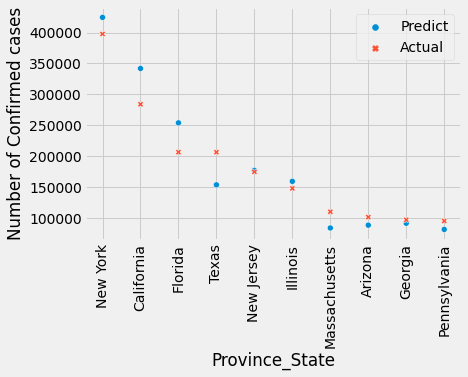

In [91]:
sns.scatterplot(data = result)
plt.ylabel('Number of Confirmed cases')
plt.xticks(rotation = 90);

From the plot, we can see that the model does pretty well. Lets check for some staticstics:

In [92]:
print("Mean absolute error: %.2f" % mean_absolute_error(top10_states.Confirmed, predict))
print("Root Mean squares (RMSE): %.2f" % mean_squared_error(top10_states.Confirmed, predict, squared=False))
print("R2-score: %.3f" % r2_score(top10_states.Confirmed, predict))

Mean absolute error: 25710.65
Root Mean squares (RMSE): 32129.01
R2-score: 0.880


Model 2

In [93]:
X = us_medical_data.drop(['Confirmed', 'Recovered','Lat', 'Long_'], axis = 1)
y = us_medical_data.Confirmed
model = LinearRegression()
model.fit(X, y)
predict = model.predict(top10_states.drop(['Confirmed', 'Recovered', 'Lat', 'Long_'], axis = 1))

In [94]:
result = pd.DataFrame({'Predict': predict.round().astype(int), 'Actual': top10_states.Confirmed})
result

Predict  Actual
Province_State                 
New York         416833  397649
California       341974  283940
Florida          253433  206447
Texas            152519  206410
New Jersey       174139  174766
Illinois         158672  147865
Massachusetts     81251  110137
Arizona           88202  101455
Georgia           91138   97064
Pennsylvania      79941   95169

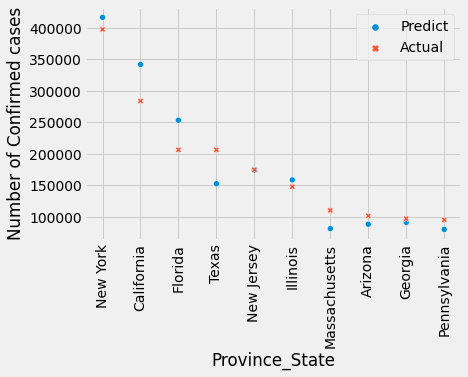

In [95]:
sns.scatterplot(data = result)
plt.ylabel('Number of Confirmed cases')
plt.xticks(rotation = 90);

From the plot, we can see that this model also does pretty well. Lets check for some staticstics:

In [96]:
print("Mean absolute error: %.2f" % mean_absolute_error(top10_states.Confirmed, predict))
print("Root Mean squares (RMSE): %.2f" % mean_squared_error(top10_states.Confirmed, predict, squared=False))
print("R2-score: %.3f" % r2_score(top10_states.Confirmed, predict))

Mean absolute error: 25282.32
Root Mean squares (RMSE): 32003.44
R2-score: 0.881


Compare those metrics, we can see that model 2 does a slightly better job than the first one.